# 主成分分析

In [33]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn import datasets
%matplotlib inline

### ライブラリで実装

In [ ]:
# TODO：お勉強でやってることを実務で使えるようにライブラリで書く

### お勉強用

- 考え方
    - データの間に相関がある→情報を圧縮できるのでは
- ざっくり数理
    - やりたいこと：情報をなるべく失わずに圧縮
    - step1
        - データベクトル$\bold{x}$
        - $z_1 = w_{11} x_1 + \cdots + w_{1N} x_N = \bold{w_1}\cdot\bold{x}$の$\bold{w_1}$を$|\bold{w_1}|=1$のもとで$Var[{z_1}]$を最大化する
            - 分散を最大化するのはなぜ？
                - 主成分分析においては，｢情報 = 分散｣
        - $\bold{w_1}$は第1主成分(の負荷量ベクトル)
        - $z_1$は第1主成分得点
    - step2
        - $\bold{w_2}$を$\bold{w_1} \perp \bold{w_2}, |\bold{w_2}|=1$の元で$z_2$の分散を最大化するように最適化する
    - step3
        - これを繰り返して，(変数の個数x変数の個数)の行列$\bold{w}$を作る
        - 第k主成分は，k番目にばらつきが大きい方向
    - 実は，zからxへの回帰分析の残差が最小になる！
        - zが分散最大，すなわちたくさん情報をもっているからxの説明ができる，ということ
- できること･わかること
    - 主成分を見ることで，どういう方向にデータがばらつくかが分かる
    - 主成分得点を見ることで，データを要約できる
    - explained variance ratioをみつことで，どの程度情報を保持しているか分かる
        - 情報量が分散ならば，回帰分析で元に戻した時，分散の何％が説明できるのか？
            - 100%に近いほど良い．大体80〜90％くらいあればいい感じの圧縮だと言われている
    - たとえば，
        - テキスト分析
            - Bag of Wordsはベクトルがでかい(かつsparse)ので主成分分析をする，とか

In [34]:
iris = datasets.load_iris()


# 'sepal length (cm)' : がく片長
# 'sepal width (cm)'  : がく片幅
# 'petal length (cm)' : 花びら長
# 'petal width (cm)'  : 花びら幅

print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [35]:
# 使用するデータセットの読み込み
X = iris['data']
print(X.shape)
# データの中心化
Xc = X - np.mean(X, axis=0)
# 分散共分散行列
Σ = Σ = np.cov(Xc.T, bias=False) # Falseで不偏分散
print(Σ.shape)

(150, 4)
(4, 4)


In [36]:
# 固有値問題

# L: 固有値
# V: 固有ベクトル
#    縦ベクトルで格納されていることに注意
#    eigではノルムが1になるように正規化されている

L, V = np.linalg.eig(Σ)
# 固有値の降順ソート用インデックスの作成
inds = np.argsort(L)[::-1]
# 固有値を降順ソート
L = L[inds]
# 対応する固有ベクトルもソート
W = V[:, inds]
print(W.shape)

(4, 4)


In [37]:
# 圧縮する次元数
# 今回は4次元のirisデータセットを2次元に圧縮する
dim = 2
# 主成分得点の計算
F = Xc @ W[:, :dim]
print(F.shape)

(150, 2)


In [38]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

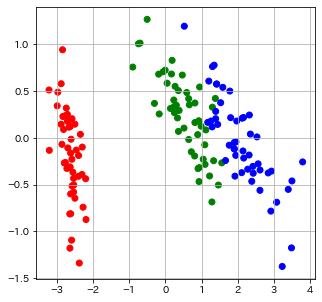

In [39]:
fig, ax = plt.subplots(figsize=(5,5))

colors = []
for i in iris['target']:
    if i == 0:
        colors.append('red') # setosa
    elif i == 1:
        colors.append('green') # versicolor
    else:
        colors.append('blue') # virginica

ax.scatter(F[:, 0], F[:, 1], color=colors)

ax.set_label(['se'])
ax.grid()

fig.show()


[0.92461872 0.05306648 0.01710261 0.00521218]
[0.92461872 0.97768521 0.99478782 1.        ]


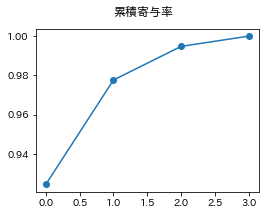

In [40]:
# 寄与率の計算
cntr = L / L.sum()
print(cntr)
cntr_acc = cntr.cumsum()
print(cntr_acc)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(cntr_acc, marker='o')
fig.suptitle('累積寄与率')
fig.show()

In [43]:
# 特徴量

# 'sepal length (cm)' : がく片長
# 'sepal width (cm)'  : がく片幅
# 'petal length (cm)' : 花びら長
# 'petal width (cm)'  : 花びら幅

In [44]:
# 第1主成分の固有ベクトル
print(W[:,0])
# 第2主成分の固有ベクトル
print(W[:,1])

[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
[-0.65658877 -0.73016143  0.17337266  0.07548102]


- 第1主成分
    - 花びら長が大きい値を取っている
    - がく片幅がほぼ0
    - 花びら長に関連の強い特徴量？
- 第2主成分
    - がく片長とがく片幅が負に大きく，花びらは0に近い
    - がくの大きさに関係のある特徴量？

In [52]:
# 単位の大きさを排除した主成分負荷量を見てみる
# 主成分負荷料は，特徴量と主成分得点の相関係数

Z = np.concatenate([Xc, F], axis=1)
PCL = np.corrcoef(Z.T, bias=True) # 不偏分散を用いない
print(PCL.shape)
# print(PCL)
PCL = PCL[:Xc.shape[1], -F.shape[1]:]
print(PCL.shape)
PCL

(6, 6)
[[ 1.00000000e+00 -1.17569784e-01  8.71753776e-01  8.17941126e-01
   8.97401762e-01 -3.90604413e-01]
 [-1.17569784e-01  1.00000000e+00 -4.28440104e-01 -3.66125933e-01
  -3.98748472e-01 -8.25228709e-01]
 [ 8.71753776e-01 -4.28440104e-01  1.00000000e+00  9.62865431e-01
   9.97873942e-01  4.83805997e-02]
 [ 8.17941126e-01 -3.66125933e-01  9.62865431e-01  1.00000000e+00
   9.66547517e-01  4.87816029e-02]
 [ 8.97401762e-01 -3.98748472e-01  9.97873942e-01  9.66547517e-01
   1.00000000e+00 -1.21725900e-15]
 [-3.90604413e-01 -8.25228709e-01  4.83805997e-02  4.87816029e-02
  -1.21725900e-15  1.00000000e+00]]
(4, 2)


array([[ 0.89740176, -0.39060441],
       [-0.39874847, -0.82522871],
       [ 0.99787394,  0.0483806 ],
       [ 0.96654752,  0.0487816 ]])

- 固有値を用いた解釈とは異なる
- 第1主成分
    - がく片幅以外の特徴量に高い相関が見られる
        - つまり，花びら長に関係のある特徴量ではなく，｢がく片長と花びらの大きさに対応した｣特徴量
- 第2主成分
    - がく片幅が負に大きい相関を持つので，がく片幅に対応した特徴量であるといえる
    - こちらは固有値を用いた解釈と同じ
- したがって，散布図から得られる考察としては
    - 第1主成分でSetosaだけ左軸によっていることを考えると，Versicolor及びVirginicaと比べると，｢がく片幅｣に差は無いけれれど，それ以外の特徴量においては差があると言える